# Analysis of Baseball Performance Since 1955
### Justin "Roy" Garrard | 06/23/17

### Introduction

Baseball has long been a staple of American sports, predating American Football and Basketball. It's reasonable to wonder then, if professional players on the whole have gotten any better at the sport. The following data analysis will consider two questions to that end:

1. Are batters getting better at batting?
2. Are pitchers getting better at pitching?

The results will then be interpreted to see if any conclusions can be drawn with regards to overall improvements in Major League Baseball performance.

### Methodology

The analysis will make use of Sean Lahman's Major League Baseball data set. Data will be restricted to records from 1955 and later (incorporating some statistics that had not reliably been tracked until this date).

Batting and pitching ability will be assessed using sabermetrics, a form of Baseball statistics that places an emphasis on player performance. Batting skill is reflected in the metric "On-Base plus Slugging" (OPS). Pitching skill is measured with "Fielding Independent Pitching" (FIP). The calculations for both can be seen in their respective sections.

### Setup and Data Wrangling

In [1]:
# Import libraries

# Jupyter will give you a heads-up if you're missing any
import unicodecsv
import seaborn as sns
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
from collections import defaultdict

#### Batting Data

In [2]:
# Load data into Pandas structures
with open("Batting.csv", 'rb') as f:
    batting_df = pd.read_csv(f)

In [3]:
# Get a feel for the data
batting_df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


In [4]:
batting_df.tail()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
102811,zimmejo02,2016,1,DET,AL,19,4,0,1,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,1.0,0.0,0.0
102812,zimmery01,2016,1,WAS,NL,115,427,60,93,18,...,46.0,4.0,1.0,29,104.0,1.0,5.0,0.0,6.0,12.0
102813,zobribe01,2016,1,CHN,NL,147,523,94,142,31,...,76.0,6.0,4.0,96,82.0,6.0,4.0,4.0,4.0,17.0
102814,zuninmi01,2016,1,SEA,AL,55,164,16,34,7,...,31.0,0.0,0.0,21,65.0,0.0,6.0,0.0,1.0,0.0
102815,zychto01,2016,1,SEA,AL,12,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Data Cleaning

# Narrow the data down to 1955 and later (when all stats are filled)
batting_df = batting_df[batting_df.yearID >= 1955]

# Remove any player that was up to bat less than five times
batting_df = batting_df[batting_df.AB >= 5]

#### Pitching Data

In [6]:
# Load data into Pandas structures
with open("Pitching.csv", 'rb') as f:
    pitching_df = pd.read_csv(f)

In [7]:
# Get a feel for the data
pitching_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,NaN,NaN,0,NaN,NaN,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,NaN,NaN,0,NaN,NaN,21,NaN,NaN,NaN


In [8]:
pitching_df.tail()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
44958,zastrro01,2016,1,CHN,NL,1,0,8,1,0,...,0.0,0.0,1.0,0,66.0,1.0,3,0.0,2.0,1.0
44959,zieglbr01,2016,1,ARI,NL,2,3,36,0,0,...,5.0,0.0,2.0,0,165.0,30.0,13,1.0,1.0,10.0
44960,zieglbr01,2016,2,BOS,AL,2,4,33,0,0,...,2.0,1.0,1.0,0,124.0,12.0,8,1.0,0.0,6.0
44961,zimmejo02,2016,1,DET,AL,9,7,19,18,0,...,0.0,3.0,2.0,0,450.0,1.0,63,1.0,5.0,8.0
44962,zychto01,2016,1,SEA,AL,1,0,12,0,0,...,2.0,0.0,1.0,0,60.0,3.0,6,0.0,1.0,1.0


In [9]:
# Data Cleaning

# Narrow the data down to 1955 and later (when all stats are filled)
pitching_df = pitching_df[pitching_df.yearID >= 1955]

# Remove any player that was up to pitch for less than nine innings
pitching_df = pitching_df[pitching_df.IPouts >= 3]

### Data Exploration

**Useful Functions**

In [10]:
'''
Calculates the average of a dataframe column for each year.

df: The input Pandas dataframe.
key: A string matching one of the dataframe's column names.
returns: A dict containing the average values for a column by year.
'''
def averager(df, key):
    averages = df.groupby('yearID')[key].mean().to_dict()
        
    return averages

In [11]:
'''
Calculates the five-year rolling average of a dataframe column for each year.
No values are returned for the first five years.

df: The input Pandas dataframe.
key: A string matching one of the dataframe's column names.
returns: A dict containing the rolling average values for a column by year.
'''
def five_year_rolling_averager(df, key):    
    averages = df.groupby('yearID')[key].mean().rolling(5, center=False).mean().to_dict()
    
    # Strip out first five years
    years = averages.keys()
    for i in range(0,4):
        mini = min(years)
        del(averages[mini])
        
    return averages

#### Batting Statistics

The data for this section would seem to indicate no obvious trends in batting ability, besides those that can be accounted for by environmental reasons (such as changing the strike zone).

The primary value used for assessing batting ability is OPS (On-Base plus Slugging). This value is derived from OBP (On-Base Percentage) and SLG (Slugging Average), which are in turn derived from values within the batting.csv file. **A higher OPS represents better batting ability**.

**Other Notes:**

* The data set used did not include the number of Singles (hits that resulted in the batter reaching first base), so the the number was estimated.
* The majority of Baseball players since 1955 would be ranked "Below Average" in their OPS. The term is taken from FanGraphs.com and is likely meant to represent an informal assessment of skill rather than an actual average.

In [12]:
'''
Calculates the On-Base Percentage (OBP) for a row.
returns: An Int representing OBP.
'''
def calculate_obp(row):
    OBP_val = (row['H'] + row['BB'] + row['HBP']) / (row['AB'] + row['BB'] + row['HBP'] + row['SF'])

    return OBP_val

In [13]:
'''
Calculates the Slugging Average (SLG) for a row.
returns: An Int representing SLG.
'''
def calculate_slg(row):
    # Data doesn't include Singles, so we're making a generous assumption
    # that all hits put the batter on base
    singles = row['H'] - row['2B'] -row['3B'] - row['HR']
    SLG_val = (singles + row['2B'] +row['3B'] + row['HR']) / (row['AB'])
    
    return SLG_val

In [14]:
'''
Calculates the On-Base percentage plus Slugging (OPS) for a row.
returns: An Int representing OPS.
'''
def calculate_ops(row):
    OPS_val = row['OBP'] + row['SLG']
    
    return OPS_val

In [15]:
batting_df['OBP'] = batting_df.apply(calculate_obp, axis=1)
batting_df['SLG'] = batting_df.apply(calculate_slg, axis=1)
batting_df['OPS'] = batting_df.apply(calculate_ops, axis=1)
batting_df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,BB,SO,IBB,HBP,SH,SF,GIDP,OBP,SLG,OPS
37449,aaronha01,1955,1,ML1,NL,153,602,105,189,37,...,49,61.0,5.0,3.0,7.0,4.0,20.0,0.366261,0.313953,0.680215
37450,aberal01,1955,1,DET,AL,39,17,0,1,0,...,0,9.0,0.0,0.0,2.0,0.0,1.0,0.058824,0.058824,0.117647
37451,abernte02,1955,1,WS1,AL,40,26,1,4,0,...,0,6.0,0.0,0.0,4.0,0.0,1.0,0.153846,0.153846,0.307692
37452,abramca01,1955,1,BAL,AL,118,309,56,75,12,...,89,69.0,2.0,3.0,3.0,3.0,6.0,0.413366,0.242718,0.656085
37453,adamsbo03,1955,1,CIN,NL,64,150,23,41,11,...,20,21.0,1.0,3.0,2.0,1.0,3.0,0.367816,0.273333,0.641149


In [16]:
# Determine average OBP, SLG, and OPS for each year
OBP_avg = averager(batting_df, 'OBP')
SLG_avg = averager(batting_df, 'SLG')
OPS_avg = averager(batting_df, 'OPS')

# Determine rolling five-year average of OBP, SLG, and OPS
OBP_avg_five = five_year_rolling_averager(batting_df, 'OBP')
SLG_avg_five = five_year_rolling_averager(batting_df, 'SLG')
OPS_avg_five = five_year_rolling_averager(batting_df, 'OPS')

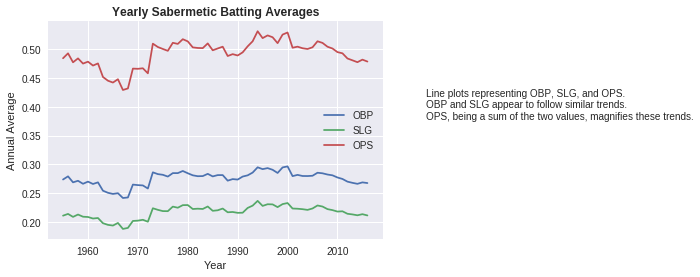

In [17]:
# Plotting average OBP, SLG, and OPS for each year (line plot)
%matplotlib inline
import matplotlib.pyplot as plt

years = [int(val) for val in list(OBP_avg.keys())]

fig = plt.figure()
ax = plt.axes()
plt.plot(years, list(OBP_avg.values()), label='OBP')
plt.plot(years, list(SLG_avg.values()), label='SLG')
plt.plot(years, list(OPS_avg.values()), label='OPS')

plt.title("Yearly Sabermetic Batting Averages", fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Annual Average")
plt.legend()

description = """
Line plots representing OBP, SLG, and OPS.
OBP and SLG appear to follow similar trends.
OPS, being a sum of the two values, magnifies these trends.
"""

fig.text(1, 0.5, description)

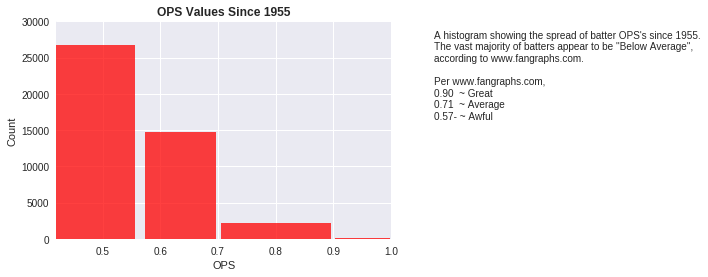

In [18]:
# Spread of all OPS values (histogram)
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes()
plt.hist(batting_df['OPS'], bins=[0, 0.57, 0.7, 0.9, 1.0], facecolor='red', alpha=0.75, rwidth=0.95)

plt.axis([0.42, 1.0, 0, 30000])
plt.title("OPS Values Since 1955", fontweight='bold')
plt.xlabel("OPS")
plt.ylabel("Count")

description = """
A histogram showing the spread of batter OPS's since 1955.
The vast majority of batters appear to be "Below Average",
according to www.fangraphs.com.

Per www.fangraphs.com,
0.90  ~ Great
0.71  ~ Average
0.57- ~ Awful
"""

fig.text(1, .5, description)

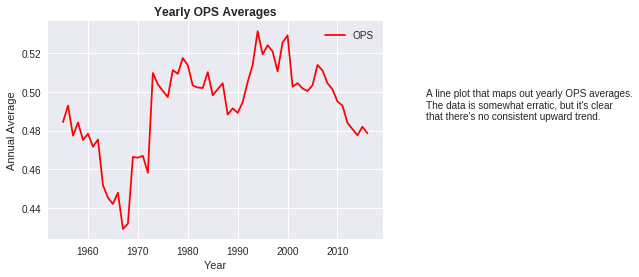

In [31]:
# Plotting average OPS for each year (line plot)
%matplotlib inline
import matplotlib.pyplot as plt

years = [int(val) for val in list(OPS_avg.keys())]

fig = plt.figure()
ax = plt.axes()
plt.plot(years, list(OPS_avg.values()), label='OPS', color='red')

plt.title("Yearly OPS Averages", fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Annual Average")
plt.legend()

description = """
A line plot that maps out yearly OPS averages.
The data is somewhat erratic, but it's clear
that there's no consistent upward trend.
"""

fig.text(1, .5, description)

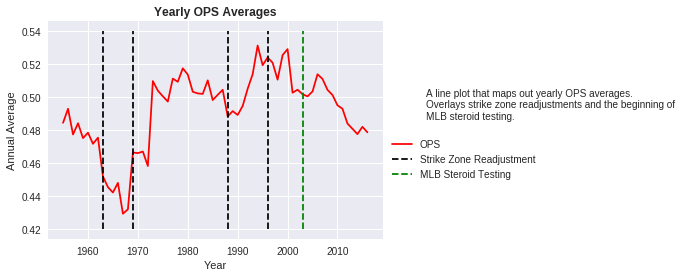

In [20]:
# Plotting average OPS for each year w/ some environmental factors
%matplotlib inline
import matplotlib.pyplot as plt

years = [int(val) for val in list(OPS_avg.keys())]

fig = plt.figure()
ax = plt.axes()
plt.plot(years, list(OPS_avg.values()), label='OPS', color='red')
plt.plot((1963, 1963), (0.42, 0.54), label='Strike Zone Readjustment', linestyle='--', color='black')
plt.plot((1969, 1969), (0.42, 0.54), linestyle='--', color='black')
plt.plot((1988, 1988), (0.42, 0.54), linestyle='--', color='black')
plt.plot((1996, 1996), (0.42, 0.54), linestyle='--', color='black')
plt.plot((2003, 2003), (0.42, 0.54), label='MLB Steroid Testing', linestyle='--', color='green')

plt.title("Yearly OPS Averages", fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Annual Average")
plt.legend()
plt.legend(bbox_to_anchor=(1.0,0.5))

description = """
A line plot that maps out yearly OPS averages.
Overlays strike zone readjustments and the beginning of
MLB steroid testing.
"""

fig.text(1, .5, description)

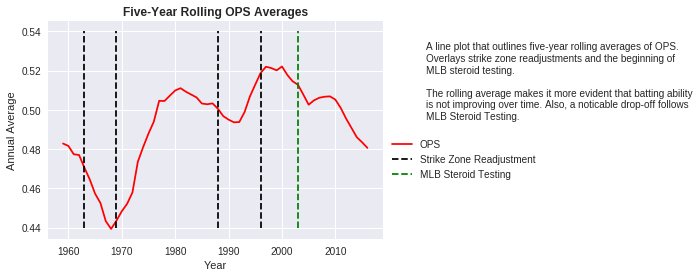

In [32]:
# Plotting five-year average OPS for each year w/ some environmental factors
%matplotlib inline
import matplotlib.pyplot as plt

years = [int(val) for val in list(OPS_avg_five.keys())]

fig = plt.figure()
ax = plt.axes()
plt.plot(years, list(OPS_avg_five.values()), label='OPS', color='Red')
plt.plot((1963, 1963), (0.44, 0.54), label='Strike Zone Readjustment', linestyle='--', color='black')
plt.plot((1969, 1969), (0.44, 0.54), linestyle='--', color='black')
plt.plot((1988, 1988), (0.44, 0.54), linestyle='--', color='black')
plt.plot((1996, 1996), (0.44, 0.54), linestyle='--', color='black')
plt.plot((2003, 2003), (0.44, 0.54), label='MLB Steroid Testing', linestyle='--', color='green')

plt.title("Five-Year Rolling OPS Averages", fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Annual Average")
plt.legend()
plt.legend(bbox_to_anchor=(1.0,0.5))

description = """
A line plot that outlines five-year rolling averages of OPS.
Overlays strike zone readjustments and the beginning of
MLB steroid testing.

The rolling average makes it more evident that batting ability
is not improving over time. Also, a noticable drop-off follows
MLB Steroid Testing.
"""

fig.text(1, .5, description)

#### Pitching Statistics

As with the previous section, pitiching skill seems more influenced by changes in the game structure than the passage of time. No consistent trend could be found in the data.

The primary value used for assessing pitching skill is FIP (Field Independent Pitching). This value is derived using several values from the pitching.csv file, as well as a specialized constant. **A lower FIP represents better pitching ability**.

**Other Notes:**

* Some pitchers had very short records (~400 of the 30,000), and were more likely temporary placeholders than full-fledged pitchers. Their records play havoc on the FIP calculation. Instead, I've substituted their FIP value for the FIP constant. This should function as a sort of average-case.
* Perhaps partially as a result of factoring out short-record pitchers, the pitcher data is more rounded out than the batter data. The FIP histogram seems to have an almost normal distribution.

In [22]:
def calculate_fip(row):
    if row['yearID'] > 1990:
        FIP_C = 3.0
    elif row['yearID'] > 1975:
        FIP_C = 2.7
    else:
        FIP_C = 2.5
    
    # Calculate FIP
    FIP_val = (((13*row['HR']) + (3*(row['BB']+row['HBP'])) - (2*row['SO'])) / (row['IPouts']/3.0)) + FIP_C
    
    if FIP_val >= 1.8:
        return FIP_val
    else:
        return FIP_C
    

In [23]:
pitching_df['FIP'] = pitching_df.apply(calculate_fip, axis=1)
pitching_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,FIP
14575,aberal01,1955,1,DET,AL,6,3,39,1,0,...,1.0,0.0,0,346.0,22.0,32,NaN,NaN,NaN,4.087500
14576,abernte02,1955,1,WS1,AL,5,9,40,14,3,...,2.0,7.0,0,553.0,12.0,87,NaN,NaN,NaN,4.016760
14577,aguirha01,1955,1,CLE,AL,2,0,4,1,1,...,1.0,0.0,0,54.0,1.0,3,NaN,NaN,NaN,4.394737
14578,alexabo01,1955,1,BAL,AL,1,0,4,0,0,...,1.0,1.0,0,22.0,2.0,6,NaN,NaN,NaN,4.250000
14579,amorvi01,1955,1,CHN,NL,0,1,4,0,0,...,1.0,0.0,1,31.0,3.0,3,NaN,NaN,NaN,3.000000


In [24]:
# Determine average FIP for each year
FIP_avg = averager(pitching_df, 'FIP')

# Determine rolling five-year FIP average for each year
FIP_avg_five = five_year_rolling_averager(pitching_df, 'FIP')

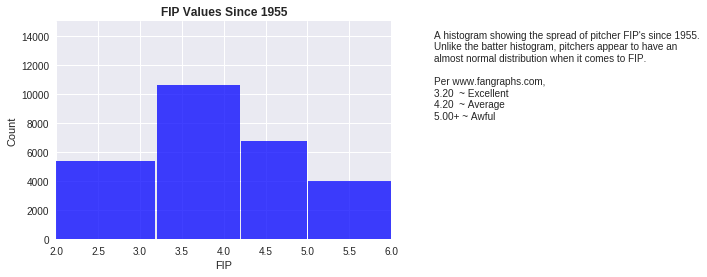

In [25]:
# Spread of all FIP values (histogram)
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes()
plt.hist(pitching_df['FIP'], bins=[0, 3.2, 4.2, 5, 6], facecolor='blue', alpha=0.75, rwidth=0.99)

plt.axis([2, 6, 0, 15000])
plt.title("FIP Values Since 1955", fontweight='bold')
plt.xlabel("FIP")
plt.ylabel("Count")

description = """
A histogram showing the spread of pitcher FIP's since 1955.
Unlike the batter histogram, pitchers appear to have an
almost normal distribution when it comes to FIP. 

Per www.fangraphs.com,
3.20  ~ Excellent
4.20  ~ Average
5.00+ ~ Awful
"""

fig.text(1, .5, description)

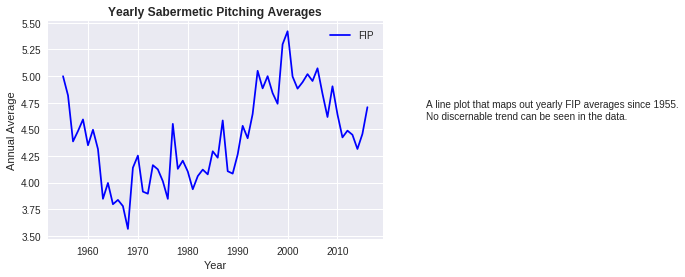

In [26]:
# Plotting average FIP for each year (line plot)
%matplotlib inline
import matplotlib.pyplot as plt

years = [int(val) for val in list(FIP_avg.keys())]

fig = plt.figure()
ax = plt.axes()
plt.plot(years, list(FIP_avg.values()), label='FIP', color='blue')

plt.title("Yearly Sabermetic Pitching Averages", fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Annual Average")
plt.legend()

description = """
A line plot that maps out yearly FIP averages since 1955.
No discernable trend can be seen in the data.
"""

fig.text(1, .5, description)

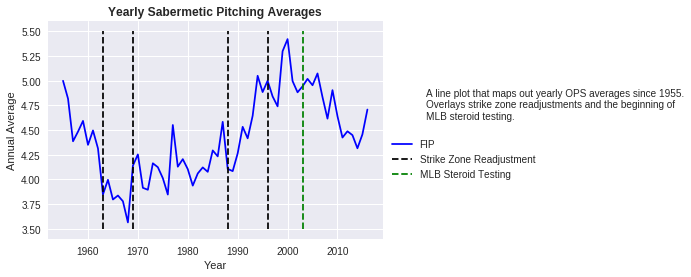

In [27]:
# Plotting average FIP for each year w/ some environmental factors
%matplotlib inline
import matplotlib.pyplot as plt

years = [int(val) for val in list(FIP_avg.keys())]

fig = plt.figure()
ax = plt.axes()
plt.plot(years, list(FIP_avg.values()), label='FIP', color='blue')
plt.plot((1963, 1963), (3.5, 5.5), label='Strike Zone Readjustment', linestyle='--', color='black')
plt.plot((1969, 1969), (3.5, 5.5), linestyle='--', color='black')
plt.plot((1988, 1988), (3.5, 5.5), linestyle='--', color='black')
plt.plot((1996, 1996), (3.5, 5.5), linestyle='--', color='black')
plt.plot((2003, 2003), (3.5, 5.5), label='MLB Steroid Testing', linestyle='--', color='green')

plt.title("Yearly Sabermetic Pitching Averages", fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Annual Average")
plt.legend()
plt.legend(bbox_to_anchor=(1.0,0.5))

description = """
A line plot that maps out yearly OPS averages since 1955.
Overlays strike zone readjustments and the beginning of
MLB steroid testing.
"""

fig.text(1, .5, description)

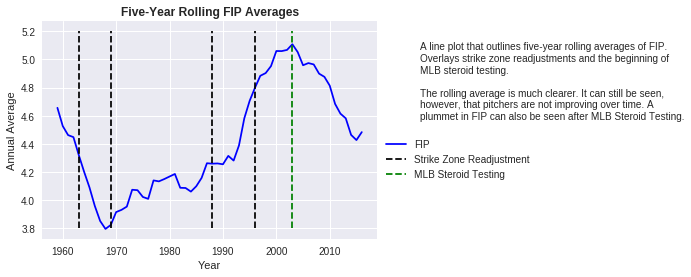

In [33]:
# Plotting five-year average OPS for each year w/ some environmental factors
%matplotlib inline
import matplotlib.pyplot as plt

years = [int(val) for val in list(FIP_avg_five.keys())]

fig = plt.figure()
ax = plt.axes()
plt.plot(years, list(FIP_avg_five.values()), label='FIP', color='blue')
plt.plot((1963, 1963), (3.8, 5.2), label='Strike Zone Readjustment', linestyle='--', color='black')
plt.plot((1969, 1969), (3.8, 5.2), linestyle='--', color='black')
plt.plot((1988, 1988), (3.8, 5.2), linestyle='--', color='black')
plt.plot((1996, 1996), (3.8, 5.2), linestyle='--', color='black')
plt.plot((2003, 2003), (3.8, 5.2), label='MLB Steroid Testing', linestyle='--', color='green')

plt.title("Five-Year Rolling FIP Averages", fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Annual Average")
plt.legend()
plt.legend(bbox_to_anchor=(1.0,0.5))

description = """
A line plot that outlines five-year rolling averages of FIP.
Overlays strike zone readjustments and the beginning of
MLB steroid testing.

The rolling average is much clearer. It can still be seen,
however, that pitchers are not improving over time. A
plummet in FIP can also be seen after MLB Steroid Testing.
"""

fig.text(1, .5, description)

#### Batting and Pitching Comparison

Despite the weak correlation, there does appear to be some form of inverse relationship between batting ability (assessed as OPS) and pitching skill (assessed as FIP) for any given year. Certainly, the "Year of the Pitcher" (1968) shows a sharp improvement in pitching (FIP) at the apparent detriment of the batters' statistics (OPS).

I suspect that the influence of environmental changes is what's blurring the correlation. However, I can't think of a way to gracefully account for such changes in order to mitigate them.

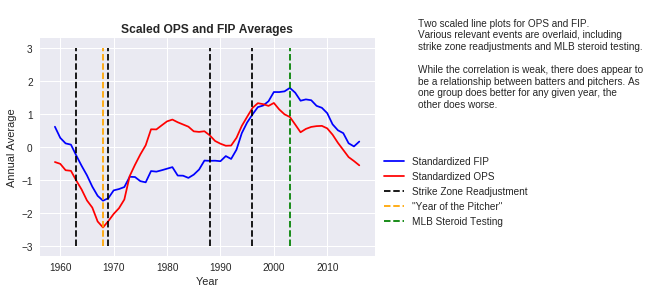

In [29]:
# Batter vs. Pitcher Statistics
%matplotlib inline
import matplotlib.pyplot as plt

years = [int(val) for val in list(FIP_avg_five.keys())]

# Standardize Variables
FIP_five_vals = list(FIP_avg_five.values())
OPS_five_vals = list(OPS_avg_five.values())

FIP_five_mean = np.mean(FIP_five_vals)
OPS_five_mean = np.mean(OPS_five_vals)
FIP_five_std = np.std(FIP_five_vals)
OPS_five_std = np.std(OPS_five_vals)
FIP_avg_std = (FIP_five_vals - FIP_five_mean)/FIP_five_std
OPS_avg_std = (OPS_five_vals - OPS_five_mean)/OPS_five_std

# Plot
fig = plt.figure()
ax = plt.axes()
plt.plot(years, FIP_avg_std, label='Standardized FIP', color='blue')
plt.plot(years, OPS_avg_std, label='Standardized OPS', color='Red')
plt.plot((1963, 1963), (-3, 3), label='Strike Zone Readjustment', linestyle='--', color='black')
plt.plot((1968, 1968), (-3, 3), label='"Year of the Pitcher"', linestyle='--', color='orange')
plt.plot((1969, 1969), (-3, 3), linestyle='--', color='black')
plt.plot((1988, 1988), (-3, 3), linestyle='--', color='black')
plt.plot((1996, 1996), (-3, 3), linestyle='--', color='black')
plt.plot((2003, 2003), (-3, 3), label='MLB Steroid Testing', linestyle='--', color='green')


plt.title("Scaled OPS and FIP Averages", fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Annual Average")
plt.legend(bbox_to_anchor=(1.0,0.5))

description = """
Two scaled line plots for OPS and FIP.
Various relevant events are overlaid, including
strike zone readjustments and MLB steroid testing.

While the correlation is weak, there does appear to
be a relationship between batters and pitchers. As
one group does better for any given year, the
other does worse.
"""

fig.text(1, 0.6, description)

In [30]:
# Linear correlation value
np.corrcoef(OPS_avg_std, FIP_avg_std)[0,1]

0.65940260449305366

### Conclusions

1.) **Are batters getting better at batting?**
* **No.** While fluctuations do occur in the data, there is no evidence of a positive or negative trend in batting ability. Rather, it appears that large scale trends (like shrinking the strike zone or changing steroid usage) have a much more significant effect.
    
    
2.) **Are pitchers getting better at pitching? (FIP)**
* **No.** There is no indication of an overall improvement in pitching skill. Like batting ability, pitching statistics appear to be more sensitive to environmental changes than the passage of time.


**Are players getting "better" at baseball?**

* **From the analysis done, the overall performance in MLB does not seem to be improving over time.** It should noted, however, that this claim comes with several caveats.

Firstly, there may very well be a change in performance that can't be seen due to the overshadowing influence of environmental changes. One example of this is the enlargment of strike zone size that occured in the early 1960's, which was then later undone by 1970. One can see the change in statistics for both pitchers and batters as pitchers came to enjoy their newfound advantage.

The second caveat concerns the running theme of pitchers vs. batters. As one side gains dominance, the other wanes. Such a trend puts into question the efficacy of using OPS and FIP as a means to assess skill, as the "skill" of the players might reasonably be thought of as somthing independent of their competitors. Is a batter any less talented when facing a talented pitcher? Their statistics would seem to say so, but I am not so sure.

Finally, it should be noted that this analysis attempts to chart performance improvements on an individual level. It does not look at improvements in team ability or coordination. The entirety of fielding defense, for instance, was not taken into consideration.


#### Other Notes

I had originally planned to answer three questions, the last being related to the performance of Hall of Fame inductees. Unfortunately, the data provided lacks the necessary metrics for calculating sabermetrics (OPS, FIP) before 1955. The end result was a pretty pitiful span of data ranging between 1995 to 2008.

For those interested, there was no noticable trend in the limited set of Hall of Fame performance data.

### External Resources

* http://www.fangraphs.com 
* http://mlb.mlb.com/mlb/official_info/umpires/strike_zone.jsp
* https://www.reddit.com/r/baseball/
* https://en.wikipedia.org/wiki/Sabermetrics